In [1]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
## load dataset
dataset = pd.read_csv('diabetes.csv')
#see how many rows & columns have
dataset.shape

(768, 9)

In [3]:
#if there have any null value than delete the row
dataset = dataset.dropna()
##see how many rows & columns have after dropping
dataset.shape

(768, 9)

In [4]:
#show first 5 rows
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
##calling describe method to view some basic statistical details
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 432x288 with 0 Axes>

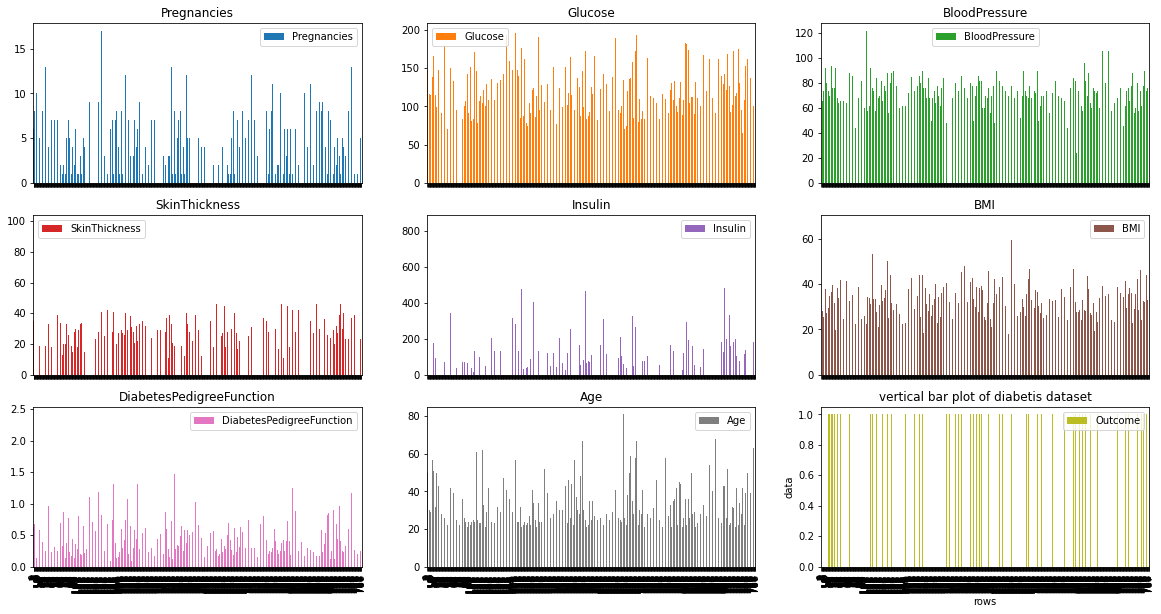

In [6]:
#vertical bar plot
plt.figure()
dataset.plot(kind='bar', subplots=True, layout=(3,3),figsize=(20,10))
plt.xlabel('rows')
plt.ylabel('data')
plt.legend()
plt.title('vertical bar plot of diabetis dataset')
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

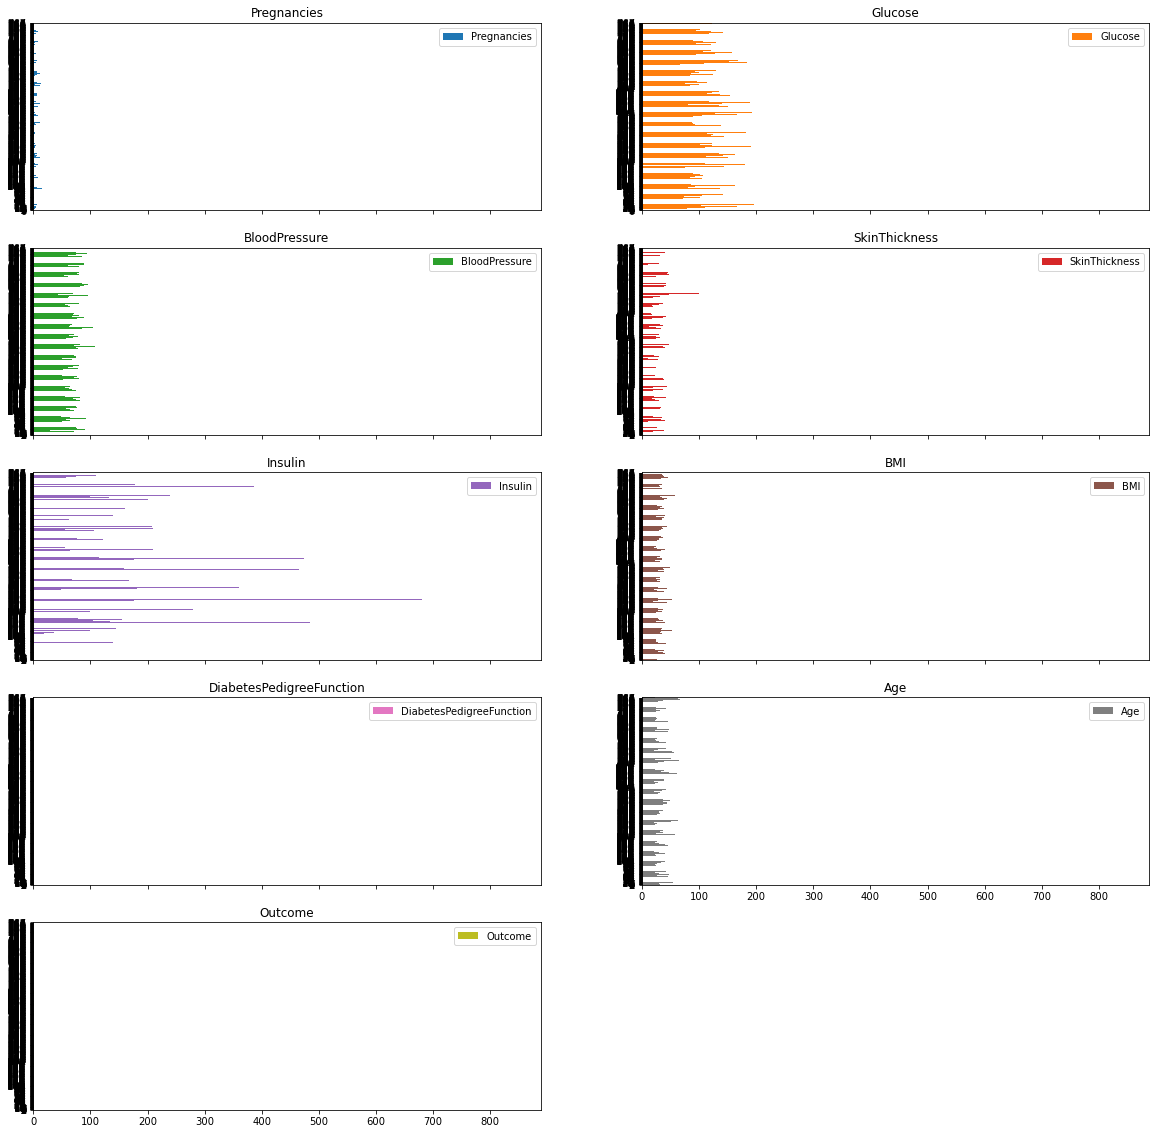

In [7]:
#horizontal bar plot
plt.figure()
dataset.plot(kind='barh', subplots=True, layout=(5,2),figsize=(20,20))
plt.xlabel('rows')
plt.ylabel('data')
plt.legend()
plt.title('horizontal bar plot of diabetis dataset')
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

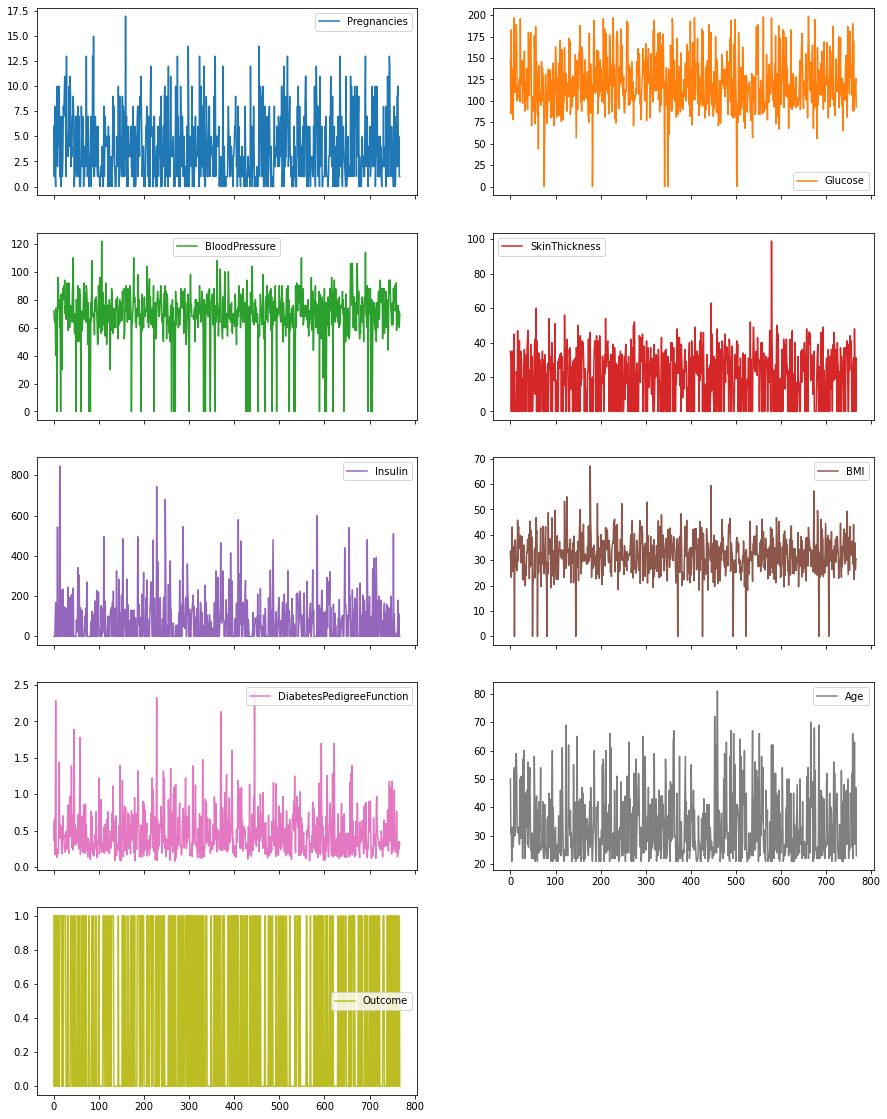

In [8]:
#line plot
plt.figure()
dataset.plot(kind='line', subplots=True, layout=(5,2),figsize=(15,20))
plt.xlabel('rows')
plt.ylabel('data')
plt.legend()
plt.title('line plot of diabetis dataset')
plt.show()

<Figure size 432x288 with 0 Axes>

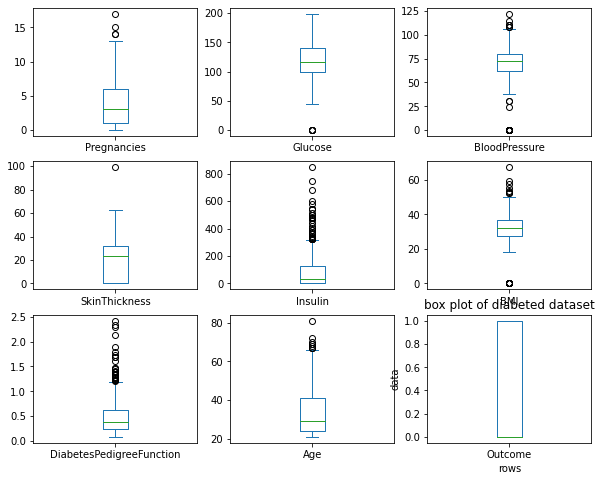

In [9]:
#box plot
plt.figure()
dataset.plot(kind='box', subplots=True, layout=(3,3),figsize=(10,8))
plt.xlabel('rows')
plt.ylabel('data')
plt.title('box plot of diabeted dataset')
plt.show()

<Figure size 432x288 with 0 Axes>

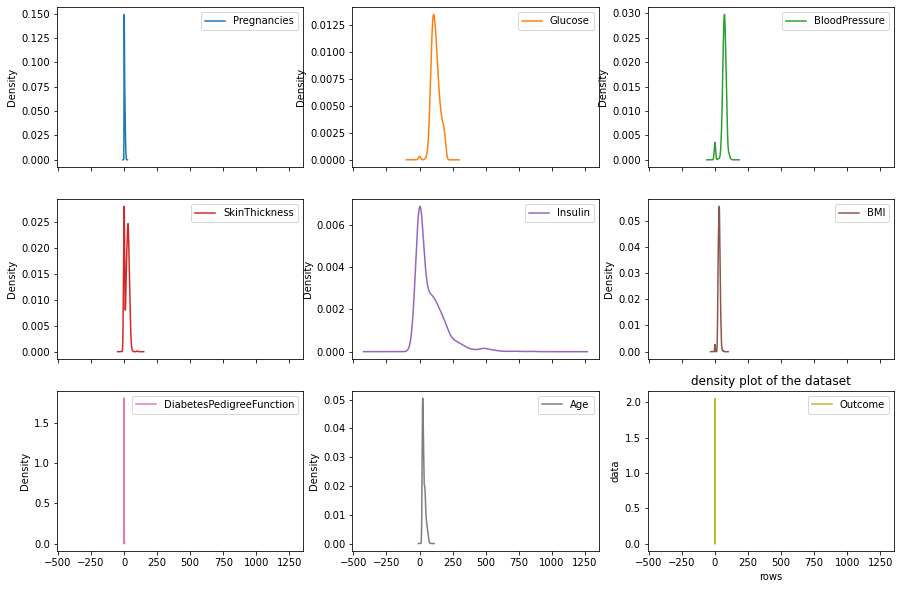

In [10]:
#density plot
plt.figure()
dataset.plot(kind='density', subplots=True, layout=(3,3),figsize=(15,10))
plt.xlabel('rows')
plt.ylabel('data')
plt.title('density plot of the dataset')
plt.show()

<Figure size 432x288 with 0 Axes>

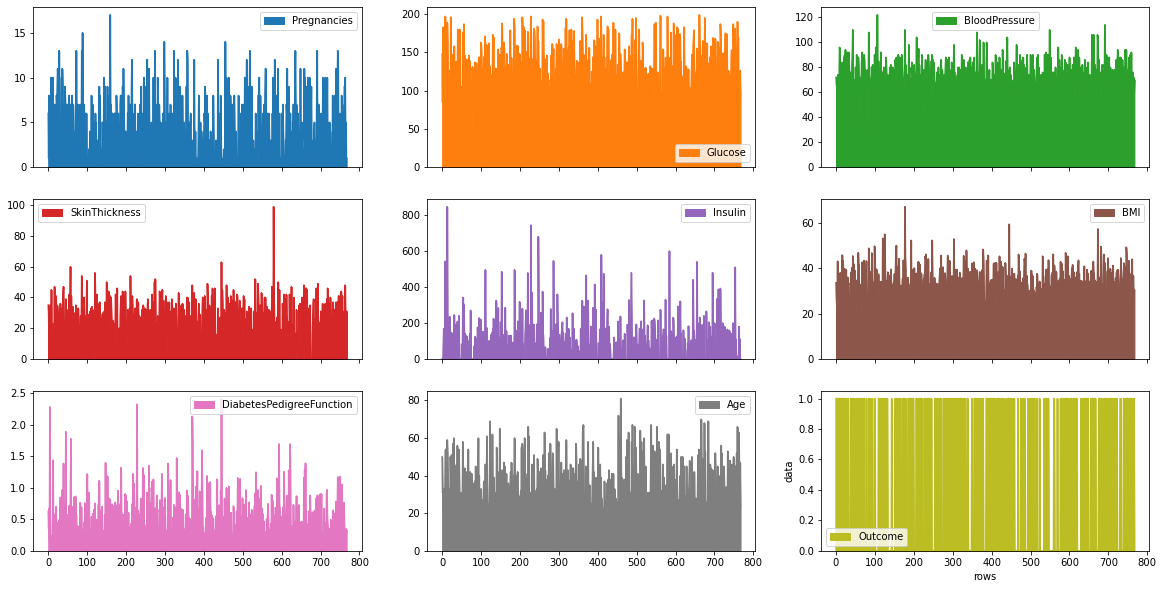

In [11]:
#dataset.plot
plt.figure()
dataset.plot(kind='area', subplots=True, layout=(3,3),figsize=(20,10))
plt.xlabel('rows')
plt.ylabel('data')
plt.show()

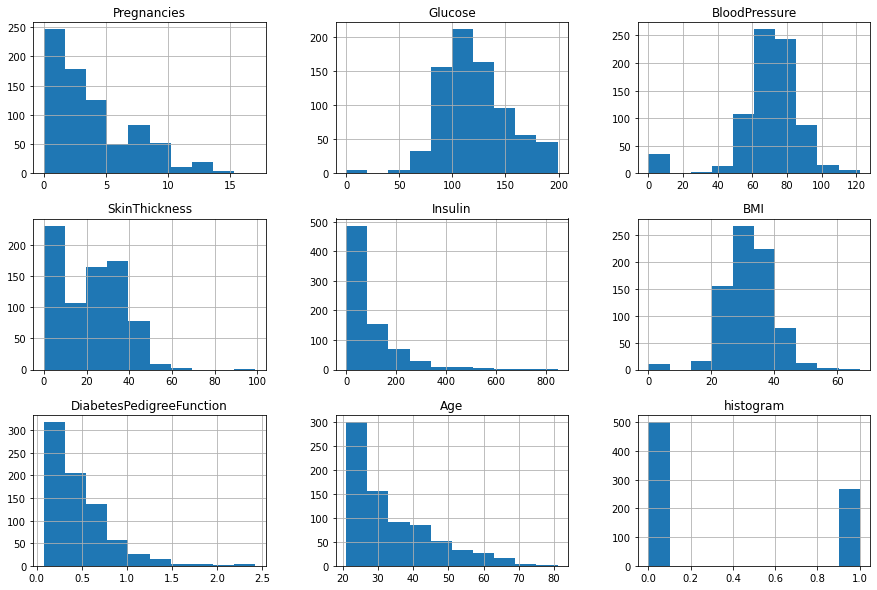

In [12]:
dataset.hist(figsize=(15,10))
plt.title('histogram')
plt.show()

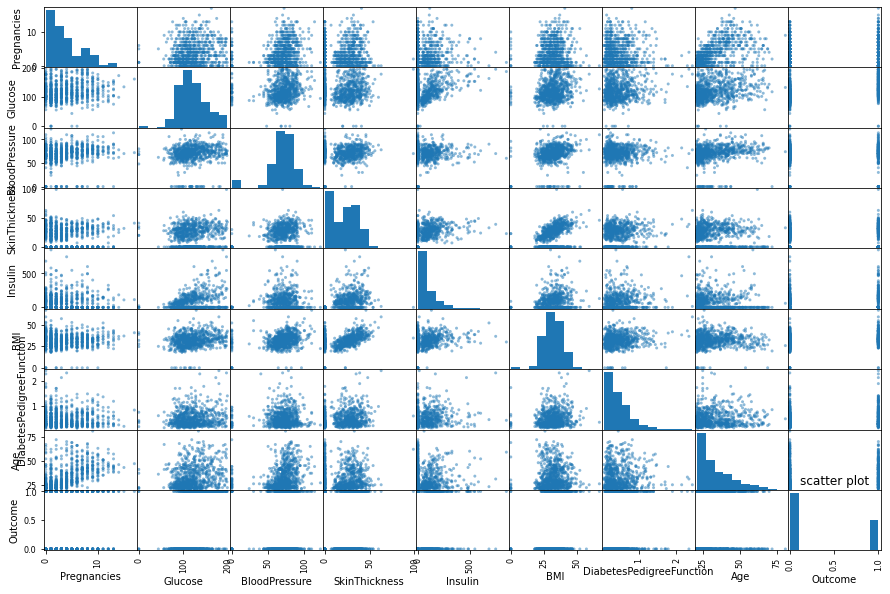

In [13]:
pd.plotting.scatter_matrix(dataset,figsize=(15,10))
plt.title('scatter plot')
plt.show()

In [14]:
#we need to predicate outcome
y=dataset['Outcome']
X=dataset.drop(['Outcome'], axis=1)

In [15]:
#calculate how many rows & columns habe in dataset
X.shape

(768, 8)

In [16]:
##checking for categorical data
X.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [17]:
# Get number of missing values in each column
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [18]:
#count positive & negative
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

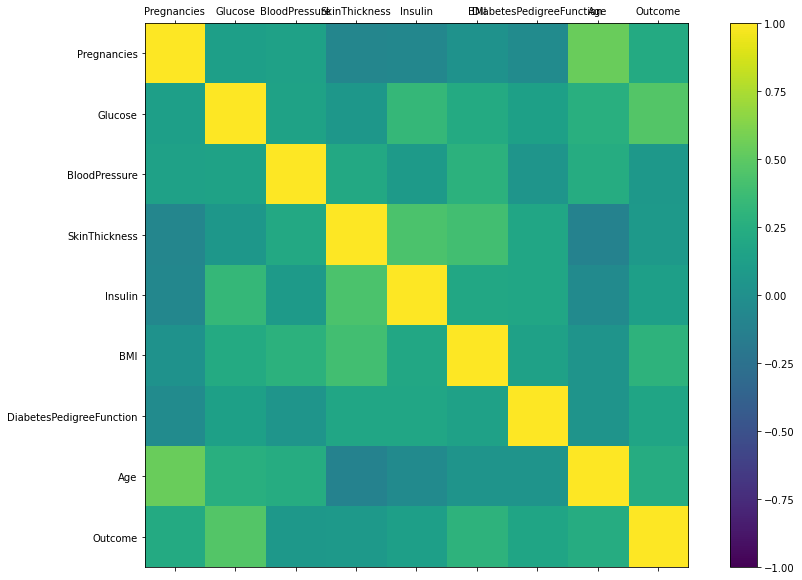

In [19]:
#calling the correlation function on the dataset
correlations = dataset.corr(method='pearson')
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
#splitting dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0, stratify=y)

In [21]:
multinb_model = MultinomialNB()
multinb_model.fit(x_train,y_train)
y_pred_multinb = multinb_model.predict(x_test)

In [22]:
#check precision_score,recall & f1 score before testing
precision = precision_score(y_test, y_pred_multinb, average='binary')
recall = recall_score(y_test, y_pred_multinb, average='binary')
f1score = f1_score(y_test, y_pred_multinb, average='binary')
print(precision)
print(recall)
print(f1score)

0.3783783783783784
0.5185185185185185
0.4375


In [23]:
#Check performance on the training data
print(classification_report(y_test,y_pred_multinb))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       100
           1       0.38      0.52      0.44        54

    accuracy                           0.53       154
   macro avg       0.53      0.53      0.52       154
weighted avg       0.57      0.53      0.54       154



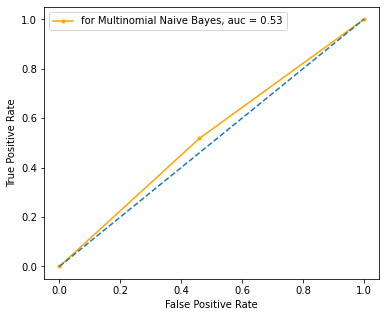

In [32]:
#plotting the roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_pred_multinb)
fpr, tpr, _ = roc_curve(y_test,y_pred_multinb)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, marker='.',color='orange',label="for Multinomial Naive Bayes, auc = %.2f"% roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



[[54 46]
 [26 28]]


Text(33.0, 0.5, 'Actual labels')

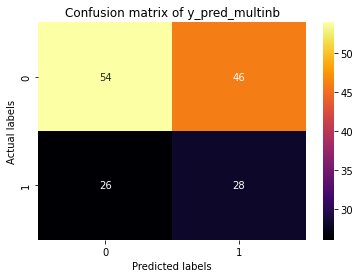

In [25]:
#plt.figure(figsize=(6, 4))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_multinb) , annot = True,fmt='d',cmap="inferno")
print(confusion_matrix(y_test,y_pred_multinb))
plt.title('Confusion matrix of y_pred_multinb')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
#plt.savefig('confusion_matrix_dataset1_svm.png')

In [26]:
clf = svm.SVC(kernel='linear')
t = clf.fit(x_train, y_train)
y_pred_svm = t.predict(x_test)

In [27]:
#check precision_score,recall & f1 score after testing
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1score_svm = f1_score(y_test, y_pred_svm, average='binary')
print(precision)
print(recall)
print(f1score)

0.3783783783783784
0.5185185185185185
0.4375


In [28]:
##Check performance on the testing data
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



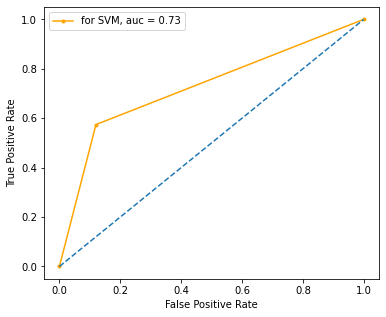

In [29]:
#plotting the roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_pred_svm)
fpr, tpr, _ = roc_curve(y_test,y_pred_svm)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, marker='.',color='orange',label="for SVM, auc = %.2f"% roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

[[88 12]
 [23 31]]


Text(33.0, 0.5, 'Actual labels')

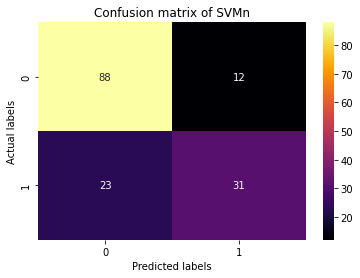

In [30]:
#plt.figure(figsize=(6, 4))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_svm) , annot = True,fmt='d',cmap="inferno")
print(confusion_matrix(y_test,y_pred_svm))
plt.title('Confusion matrix of SVMn')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
#plt.savefig('confusion_matrix_dataset1_svm.png')